## Implementation of MLP model 
### without making use of any available neural network/connectionist/ machine learning, library

1. Class define
2. Properties define
    1) input setting
    2) weight initialisation
3. Forward Propagation
4. BackProgapagtion
5. Weight update
6. Train Method
7. Train test and evaluation
8. Performance evlauation with additional train data


•Create a new MLP with any given number of inputs, any number of outputs (can be sigmoidal or linear), and any number of hidden units (sigmoidal/tanh) in a single layer.
•Initialise the weights of the MLP to small random values
•Predict the outputs corresponding to an input vector
•Implement learning by backpropagation

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

class MLP:
    def __init__(self, n_inputs, n_hidden, n_outputs, hidden_activation='tanh', output_activation='sigmoid'):
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_outputs = n_outputs
        
        # Initialize weights with small random values
        self.W1 = np.random.uniform(-0.5, 0.5, (n_inputs, n_hidden))
        self.W2 = np.random.uniform(-0.5, 0.5, (n_hidden, n_outputs))
        
        # Initialize bias terms
        self.b1 = np.zeros((1, n_hidden))
        self.b2 = np.zeros((1, n_outputs))
        
        # Set activation functions
        self.hidden_activation = hidden_activation
        self.output_activation = output_activation
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def tanh(self, x):
        return np.tanh(x)
    
    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2
    
    def forward(self, X):
        # Convert input to numpy array if not already
        X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape(1, -1)
            
        # Forward pass through hidden layer
        self.hidden_input = np.dot(X, self.W1) + self.b1
        if self.hidden_activation == 'tanh':
            self.hidden_output = self.tanh(self.hidden_input)
        elif self.hidden_activation == 'sigmoid':
            self.hidden_output = self.sigmoid(self.hidden_input)
        else:
            raise ValueError("Unsupported hidden activation function.")
        
        # Forward pass through output layer
        self.output_input = np.dot(self.hidden_output, self.W2) + self.b2
        if self.output_activation == 'sigmoid':
            self.output = self.sigmoid(self.output_input)
        elif self.output_activation == 'linear':
            self.output = self.output_input
        else:
            raise ValueError("Unsupported output activation function.")
            
        return self.output
    
    def backward(self, X, y, learning_rate):
        # Convert input to numpy array if not already
        X = np.array(X)
        if len(X.shape) == 1:
            X = X.reshape(1, -1)
        y = np.array(y)
        if len(y.shape) == 1:
            y = y.reshape(1, -1)
            
        # Calculate output layer error
        output_error = y - self.output
        if self.output_activation == 'sigmoid':
            output_delta = output_error * self.sigmoid_derivative(self.output)
        elif self.output_activation == 'linear':
            output_delta = output_error
        else:
            raise ValueError("Unsupported output activation function.")
            
        # Calculate hidden layer error
        hidden_error = np.dot(output_delta, self.W2.T)
        if self.hidden_activation == 'tanh':
            hidden_delta = hidden_error * self.tanh_derivative(self.hidden_output)
        elif self.hidden_activation == 'sigmoid':
            hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)
        else:
            raise ValueError("Unsupported hidden activation function.")
        
        # Update weights and biases
        self.W2 += learning_rate * np.dot(self.hidden_output.T, output_delta)
        self.b2 += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.W1 += learning_rate * np.dot(X.T, hidden_delta)
        self.b1 += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)
        
        # Return mean squared error
        return np.mean(output_error ** 2)


### 1. Train an MLP with 2 inputs, 3-4+ hidden units and one output on the following examples (XOR function):

### 2. At the end of training, check if the MLP predicts correctly all the examples.


Training XOR Gate with Learning Rate = 0.001
Epoch 0, LR = 0.001, Error = 0.2500
Epoch 1, LR = 0.001, Error = 0.2500
Epoch 2, LR = 0.001, Error = 0.2500
Epoch 3, LR = 0.001, Error = 0.2500
Epoch 4, LR = 0.001, Error = 0.2500
Epoch 5, LR = 0.001, Error = 0.2500
Epoch 6, LR = 0.001, Error = 0.2500
Epoch 7, LR = 0.001, Error = 0.2500
Epoch 8, LR = 0.001, Error = 0.2500
Epoch 9, LR = 0.001, Error = 0.2500
Epoch 1000, LR = 0.001, Error = 0.2498
Epoch 2000, LR = 0.001, Error = 0.2497
Epoch 3000, LR = 0.001, Error = 0.2496
Epoch 4000, LR = 0.001, Error = 0.2495
Epoch 5000, LR = 0.001, Error = 0.2494
Epoch 6000, LR = 0.001, Error = 0.2494
Epoch 7000, LR = 0.001, Error = 0.2493
Epoch 8000, LR = 0.001, Error = 0.2493
Epoch 9000, LR = 0.001, Error = 0.2492
Epoch 10000, LR = 0.001, Error = 0.2491
Epoch 11000, LR = 0.001, Error = 0.2490
Epoch 12000, LR = 0.001, Error = 0.2490
Epoch 13000, LR = 0.001, Error = 0.2489
Epoch 14000, LR = 0.001, Error = 0.2488
Epoch 15000, LR = 0.001, Error = 0.2487
Epo

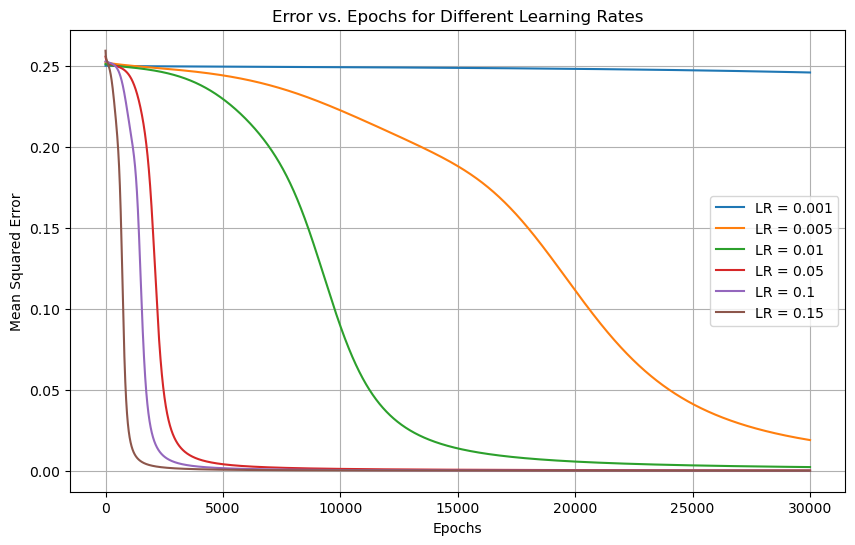


Testing XOR Gate for Learning Rate = 0.001

XOR Gate Test Results:
Input		Expected	Predicted	Classified
[0 0]		0		0.4982		0
[0 1]		1		0.5066		1
[1 0]		1		0.4945		0
[1 1]		0		0.4858		0

Testing XOR Gate for Learning Rate = 0.005

XOR Gate Test Results:
Input		Expected	Predicted	Classified
[0 0]		0		0.1104		0
[0 1]		1		0.8505		1
[1 0]		1		0.8677		1
[1 1]		0		0.1545		0

Testing XOR Gate for Learning Rate = 0.01

XOR Gate Test Results:
Input		Expected	Predicted	Classified
[0 0]		0		0.0406		0
[0 1]		1		0.9512		1
[1 0]		1		0.9500		1
[1 1]		0		0.0528		0

Testing XOR Gate for Learning Rate = 0.05

XOR Gate Test Results:
Input		Expected	Predicted	Classified
[0 0]		0		0.0137		0
[0 1]		1		0.9824		1
[1 0]		1		0.9821		1
[1 1]		0		0.0188		0

Testing XOR Gate for Learning Rate = 0.1

XOR Gate Test Results:
Input		Expected	Predicted	Classified
[0 0]		0		0.0090		0
[0 1]		1		0.9902		1
[1 0]		1		0.9884		1
[1 1]		0		0.0117		0

Testing XOR Gate for Learning Rate = 0.15

XOR Gate Test Results:
Input		Expec

In [57]:
def train_xor_with_error_analysis_and_return_mlp(learning_rate, epochs=30000):
    # XOR training data
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data
    y = np.array([[0], [1], [1], [0]])              # Expected output data
    
    # Create MLP
    mlp = MLP(n_inputs=2, n_hidden=4, n_outputs=1)  # Initialize MLP with input, hidden, and output layers
    errors = []                                     # List to store error values
    
    for epoch in range(epochs):
        epoch_error = 0                             # Initialize epoch error
        for i in range(len(X)):
            mlp.forward(X[i])                      # Perform forward propagation
            epoch_error += mlp.backward(X[i], y[i], learning_rate)  # Backpropagation and error calculation
        
        avg_error = epoch_error / len(X)           # Calculate average error for the epoch
        errors.append(avg_error)                   # Append average error to errors list
        
        # Log intermediate error for the first few epochs and periodically
        if epoch < 10 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, LR = {learning_rate}, Error = {avg_error:.4f}")
    
    # Plot Error vs. Epochs
    plt.plot(errors, label=f'LR = {learning_rate}')  # Plot error for the current learning rate
    
    return mlp  # Return the trained MLP model

def test_xor_gate(mlp):
    # XOR test data
    X_test = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input test data
    y_test = np.array([[0], [1], [1], [0]])              # Expected output for test data
    
    print("\nXOR Gate Test Results:")
    print("Input\t\tExpected\tPredicted\tClassified")
    for i in range(len(X_test)):
        predicted = mlp.forward(X_test[i])               # Perform forward propagation on test data
        classified = 1 if predicted[0][0] >= 0.5 else 0  # Binary classification based on prediction threshold
        print(f"{X_test[i]}\t\t{y_test[i][0]}\t\t{predicted[0][0]:.4f}\t\t{classified}")

if __name__ == "__main__":
    # Learning rates to test
    learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.15]
    epochs = 30000  # Number of epochs for training
    
    plt.figure(figsize=(10, 6))  # Configure the size of the plot
    
    trained_mlps = {}  # Dictionary to store trained MLP models
    
    for lr in learning_rates:
        print(f"\nTraining XOR Gate with Learning Rate = {lr}")
        # Train XOR gate with current learning rate
        trained_mlp = train_xor_with_error_analysis_and_return_mlp(learning_rate=lr, epochs=epochs)
        trained_mlps[lr] = trained_mlp  # Store the trained MLP in the dictionary
    
    # Finalize the error vs. epochs graph
    plt.title('Error vs. Epochs for Different Learning Rates')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Test the XOR gate for each trained model
    for lr, mlp in trained_mlps.items():
        print(f"\nTesting XOR Gate for Learning Rate = {lr}")
        test_xor_gate(mlp)


### 3. Generate 500 vectors containing 4 components each. The value of each component should be a random number between -1 and 1. These will be your input vectors. The corresponding output for each vector should be the sin() of a combination of the components. Specifically, for inputs: [x1 x2 x3 x4]the (single component) output should be: sin(x1-x2+x3-x4)


## 4. What is the error on training at the end? How does it compare with the error on the test set? Do you think you have learned satisfactorily?


Training the MLP with Learning Rate = 0.001...
Epoch 0/5000, Error: 0.6177
Epoch 1000/5000, Error: 0.0064
Epoch 2000/5000, Error: 0.0040
Epoch 3000/5000, Error: 0.0029
Epoch 4000/5000, Error: 0.0024

Testing the MLP with Learning Rate = 0.001...
Test Error for Learning Rate 0.001: 0.0035
Noisy Test Error for Learning Rate 0.001: 0.0195

Training the MLP with Learning Rate = 0.0025...
Epoch 0/5000, Error: 0.3234
Epoch 1000/5000, Error: 0.0031
Epoch 2000/5000, Error: 0.0012
Epoch 3000/5000, Error: 0.0003
Epoch 4000/5000, Error: 0.0001

Testing the MLP with Learning Rate = 0.0025...
Test Error for Learning Rate 0.0025: 0.0002
Noisy Test Error for Learning Rate 0.0025: 0.0193

Training the MLP with Learning Rate = 0.005...
Epoch 0/5000, Error: 0.3644
Epoch 1000/5000, Error: 0.0003
Epoch 2000/5000, Error: 0.0000
Epoch 3000/5000, Error: 0.0000
Epoch 4000/5000, Error: 0.0000

Testing the MLP with Learning Rate = 0.005...
Test Error for Learning Rate 0.005: 0.0001
Noisy Test Error for Learnin

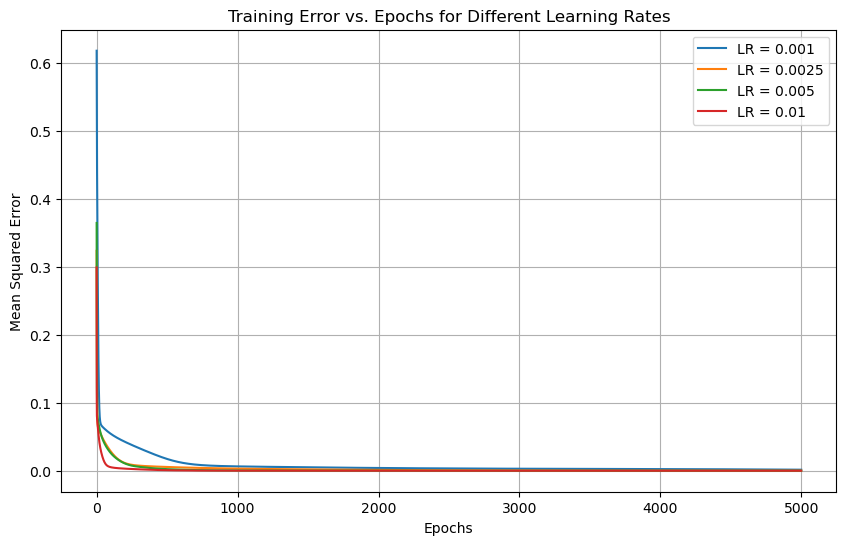

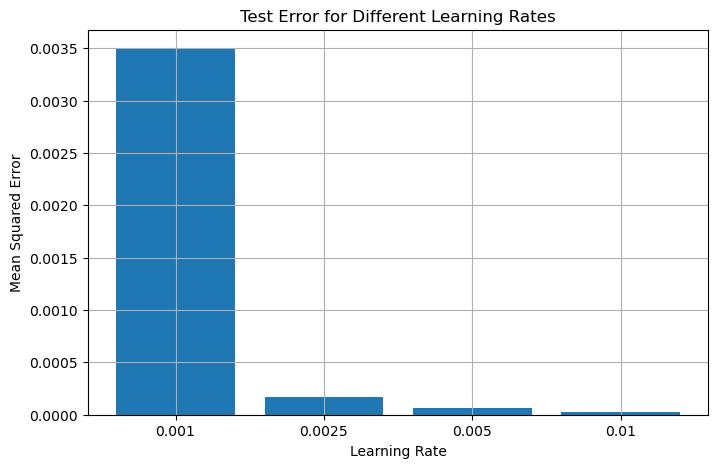


Detailed Test Results for Learning Rate = 0.001:
Input							Expected		Predicted
[ 0.00439002  0.19077003 -0.86584705  0.49992094]		-0.9998		-0.9829
[ 0.92598401 -0.31625567  0.26524379  0.86405621]		0.5999		0.5949
[ 0.59742838 -0.41435593  0.95994066  0.20376318]		0.9806		0.9430
[0.6131223  0.31756673 0.38455313 0.6983913 ]		-0.0183		-0.0010
[0.19645059 0.47132623 0.99669502 0.86622666]		-0.1439		-0.1310

Detailed Test Results for Learning Rate = 0.0025:
Input							Expected		Predicted
[ 0.00439002  0.19077003 -0.86584705  0.49992094]		-0.9998		-0.9952
[ 0.92598401 -0.31625567  0.26524379  0.86405621]		0.5999		0.5991
[ 0.59742838 -0.41435593  0.95994066  0.20376318]		0.9806		0.9608
[0.6131223  0.31756673 0.38455313 0.6983913 ]		-0.0183		-0.0182
[0.19645059 0.47132623 0.99669502 0.86622666]		-0.1439		-0.1413

Detailed Test Results for Learning Rate = 0.005:
Input							Expected		Predicted
[ 0.00439002  0.19077003 -0.86584705  0.49992094]		-0.9998		-1.0014
[ 0.92598401 -0.31625567  0.2

In [94]:
from sklearn.utils import shuffle

# Generate 500 input vectors with 4 components for each
# https://numpy.org/doc/stable/reference/random/generator.html

# Generate dataset
np.random.seed(42)
inputs = np.random.uniform(-1, 1, (500, 4))
outputs = np.sin(inputs[:, 0] - inputs[:, 1] + inputs[:, 2] - inputs[:, 3])

# Step 1: Shuffle the dataset
inputs, outputs = shuffle(inputs, outputs, random_state=42)

# Step 2: Split the dataset into training and testing sets (400 is training data, 100 is testing data)
train_inputs, test_inputs = inputs[:400], inputs[400:]  # 0~400 / #400~500
train_outputs, test_outputs = outputs[:400].reshape(-1, 1), outputs[400:].reshape(-1, 1) 

# Set learning rates and maximum epochs
learning_rates = [0.001, 0.0025, 0.005, 0.01]
max_epochs = 5000

test_errors = {}
test_results = {}

plt.figure(figsize=(10, 6))  # Initialize the plot for training error

for lr in learning_rates:
    print(f"\nTraining the MLP with Learning Rate = {lr}...")
    mlp = MLP(n_inputs=4, n_hidden=5, n_outputs=1, hidden_activation='tanh', output_activation='linear')
    errors = []

    for epoch in range(max_epochs):
        epoch_error = 0
        for input_vector, output_value in zip(train_inputs, train_outputs):
            mlp.forward(input_vector)
            epoch_error += mlp.backward(input_vector, output_value, lr)
        avg_epoch_error = epoch_error / len(train_inputs)
        errors.append(avg_epoch_error)
        if epoch % 1000 == 0:  # Log every 1000 epochs for better readability
            print(f"Epoch {epoch}/{max_epochs}, Error: {avg_epoch_error:.4f}")
    
    # Plot training error for this learning rate
    plt.plot(errors, label=f'LR = {lr}')

    # Evaluate and save test results
    print(f"\nTesting the MLP with Learning Rate = {lr}...")
    test_predictions = [mlp.forward(x)[0][0] for x in test_inputs]
    test_error = np.mean((test_outputs.flatten() - np.array(test_predictions))**2)
    test_errors[lr] = test_error

    # Store test results
    test_results[lr] = []
    for i in range(len(test_inputs)):
        test_results[lr].append({
            "Input": test_inputs[i],
            "Expected": test_outputs[i][0],
            "Predicted": test_predictions[i]
        })
    print(f"Test Error for Learning Rate {lr}: {test_error:.4f}")

    # Step 3: Evaluate on noisy test data
    noisy_test_inputs = test_inputs + np.random.normal(0, 0.1, test_inputs.shape)  # Add noise
    noisy_test_predictions = [mlp.forward(x)[0][0] for x in noisy_test_inputs]
    noisy_test_error = np.mean((test_outputs.flatten() - np.array(noisy_test_predictions))**2)
    print(f"Noisy Test Error for Learning Rate {lr}: {noisy_test_error:.4f}")

# Display the training error graph
plt.title('Training Error vs. Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Display the test error bar chart
plt.figure(figsize=(8, 5))
plt.bar([str(lr) for lr in learning_rates], list(test_errors.values()))
plt.title("Test Error for Different Learning Rates")
plt.xlabel("Learning Rate")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

# Print detailed test results
for lr in learning_rates:
    print(f"\nDetailed Test Results for Learning Rate = {lr}:")
    print("Input\t\t\t\t\t\t\tExpected\t\tPredicted")
    for result in test_results[lr][:5]:  # Display the top 5 test results
        print(f"{result['Input']}\t\t{result['Expected']:.4f}\t\t{result['Predicted']:.4f}")


## Special test

In [86]:
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
class MLP_Letter:
    def __init__(self, num_inputs, num_hidden, num_outputs):
        # Initialize sizes
        self.NI = num_inputs
        self.NH = num_hidden
        self.NO = num_outputs
        
        # Xavier Initialization
        self.W1 = np.random.randn(self.NI, self.NH) * np.sqrt(1 / self.NI)
        self.W2 = np.random.randn(self.NH, self.NO) * np.sqrt(1 / self.NH)
        self.dW1 = np.zeros((self.NI, self.NH))
        self.dW2 = np.zeros((self.NH, self.NO))
        
    def softmax(self, x):
        if x.ndim == 1:  # If x is a 1D array (single example)
            exp_x = np.exp(x - np.max(x))
            return exp_x / np.sum(exp_x)
        else:  # If x is a 2D array (batch of examples)
            exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
            return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def forward(self, I):
        # Forward pass with tanh activation
        self.Z1 = np.dot(I, self.W1)
        self.H = np.tanh(self.Z1)
        
        self.Z2 = np.dot(self.H, self.W2)
        self.O = self.softmax(self.Z2)  # Using softmax for multi-class output
        return self.O
    
    def backward(self, I, t):
        # Cross-entropy error (log loss) gradient
        error = self.O - t
        output_delta = error  # since it's softmax combined with cross-entropy
        
        # Weight gradients
        self.dW2 += np.outer(self.H, output_delta)
        hidden_delta = (1 - self.H ** 2) * np.dot(self.W2, output_delta)
        
        self.dW1 += np.outer(I, hidden_delta)
        
        # Return cross-entropy error for monitoring
        return -np.sum(t * np.log(self.O + 1e-15))  # Adding a small value for numerical stability
    
    def update_weights(self, learning_rate):
        # Update weights with gradients and reset dW
        self.W1 -= learning_rate * self.dW1
        self.W2 -= learning_rate * self.dW2
        self.dW1.fill(0)
        self.dW2.fill(0)
    
    def train(self, examples, max_epochs=1000, learning_rate=0.01, batch_size=10):
        accuracy_list = []
        error_list = []
        for epoch in range(max_epochs):
            total_error = 0
            for i in range(0, len(examples), batch_size):
                batch_examples = examples[i:i + batch_size]
                
                for input_vector, target in batch_examples:
                    self.forward(input_vector)
                    total_error += self.backward(input_vector, target)
                
                self.update_weights(learning_rate)
            
            accuracy = self.evaluate(examples, verbose=False)
            accuracy_list.append(accuracy)
            error_list.append(total_error)
            print(f"Epoch {epoch}, Error: {total_error:.4f}, Accuracy: {accuracy}%")
        
        return error_list, accuracy_list
    
    def evaluate(self, examples, verbose=True):
        correct = 0
        for input_vector, target in examples:
            output = self.forward(input_vector)
            prediction = np.argmax(output)
            target_label = np.argmax(target)
            if prediction == target_label:
                correct += 1
        accuracy = correct / len(examples) * 100
        return accuracy

    def predict(self, inputs):
        predictions = []
        for input_vector in inputs:
        # Ensure each input_vector is 2D for correct np.dot operation
            input_vector = input_vector.reshape(1, -1)
            predictions.append(self.forward(input_vector)[0])  # Access first row
        return np.array(predictions)


Training with 10 hidden units...
Epoch 0, Error: 39964.9273, Accuracy: 49.956250000000004%
Epoch 1, Error: 25775.5402, Accuracy: 61.331250000000004%
Epoch 2, Error: 21290.1999, Accuracy: 65.70625%
Epoch 3, Error: 19342.6343, Accuracy: 68.13125%
Epoch 4, Error: 18303.4158, Accuracy: 69.1375%
Epoch 5, Error: 17648.0182, Accuracy: 69.875%
Epoch 6, Error: 17182.3938, Accuracy: 70.43125%
Epoch 7, Error: 16825.2064, Accuracy: 70.8125%
Epoch 8, Error: 16537.6633, Accuracy: 71.025%
Epoch 9, Error: 16298.7454, Accuracy: 71.1375%
Epoch 10, Error: 16095.1601, Accuracy: 71.1875%
Epoch 11, Error: 15917.8017, Accuracy: 71.39375%
Epoch 12, Error: 15760.5596, Accuracy: 71.5%
Epoch 13, Error: 15619.5809, Accuracy: 71.72500000000001%
Epoch 14, Error: 15492.5266, Accuracy: 71.90625%
Epoch 15, Error: 15377.8535, Accuracy: 72.0%
Epoch 16, Error: 15274.2672, Accuracy: 72.175%
Epoch 17, Error: 15180.4636, Accuracy: 72.32499999999999%
Epoch 18, Error: 15095.1232, Accuracy: 72.34375%
Epoch 19, Error: 15017.00

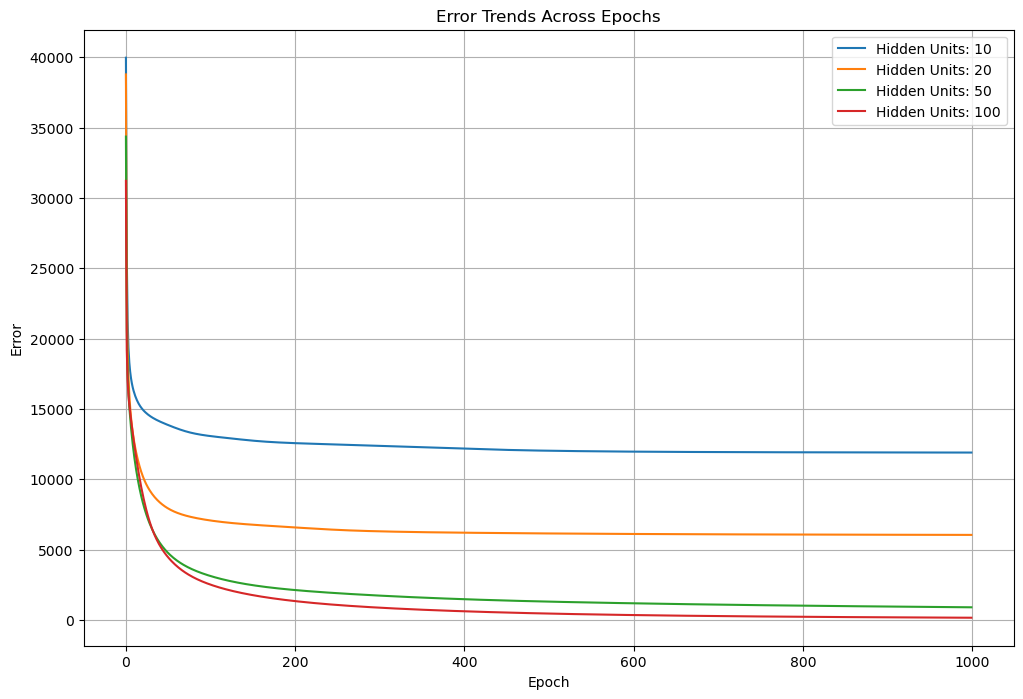

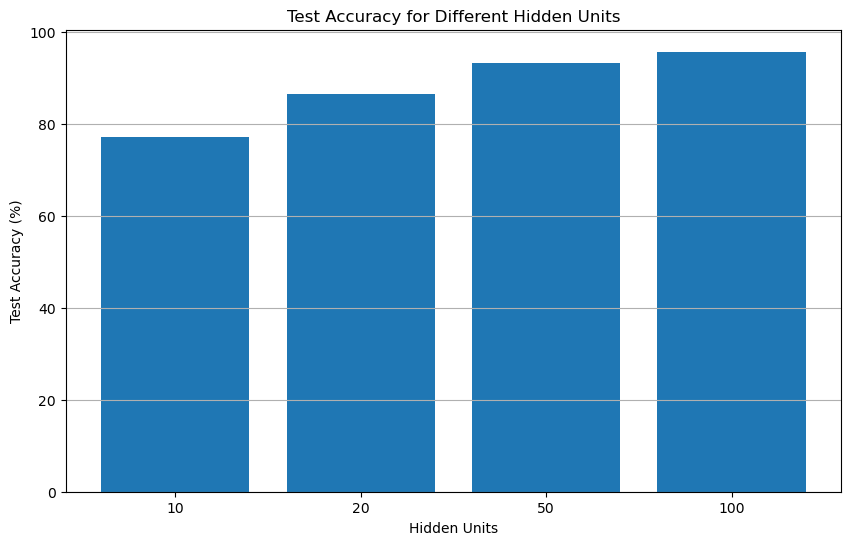

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
import matplotlib.pyplot as plt

# Load the data from the UCI repository
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
data = pd.read_csv(url, header=None)

# Rename columns for clarity
columns = ['letter'] + [f'feature_{i}' for i in range(1, 17)]
data.columns = columns

# Split data into input features and target labels
X = data.iloc[:, 1:].values  # Features (16 attributes)
y = data.iloc[:, 0].values   # Target letters

# Normalize input features for better training stability
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# One-hot encode the target labels for multi-class classification
lb = LabelBinarizer()
y_binarized = lb.fit_transform(y)

# Split the dataset: 4/5 for training and 1/5 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y_binarized, test_size=0.2, random_state=42)

# Prepare training and test data in (input, output) format for MLP_Letter
train_data = list(zip(X_train, y_train))
test_data = list(zip(X_test, y_test))

# Initialize experiment parameters
hidden_units = [10, 20, 50, 100]
max_epochs = 1000
learning_rate = 0.01
batch_size = 32

# Store results for each hidden unit configuration
results = {}

# Experiment with different hidden unit configurations
for num_hidden in hidden_units:
    print(f"\nTraining with {num_hidden} hidden units...")
    
    # Initialize the MLP model with appropriate dimensions
    num_inputs = X_train.shape[1]      # 16 features
    num_outputs = y_binarized.shape[1] # 26 letters (A-Z)
    
    mlp = MLP_Letter(num_inputs=num_inputs, num_hidden=num_hidden, num_outputs=num_outputs)
    
    # Train the model
    error_list, accuracy_list = mlp.train(train_data, max_epochs=max_epochs, learning_rate=learning_rate, batch_size=batch_size)
    
    # Store the error and accuracy lists for plotting
    results[num_hidden] = {
        'error_list': error_list,
        'accuracy_list': accuracy_list,
        'test_accuracy': mlp.evaluate(test_data, verbose=False)
    }
    
    # Print test accuracy
    print(f"Test Accuracy for {num_hidden} hidden units: {results[num_hidden]['test_accuracy']:.2f}%")

# Plot 1: Line plots for Error trends across epochs for each hidden unit configuration
plt.figure(figsize=(12, 8))
for num_hidden in hidden_units:
    plt.plot(range(max_epochs), results[num_hidden]['error_list'], label=f"Hidden Units: {num_hidden}")
plt.title("Error Trends Across Epochs")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Bar chart showing Test Accuracy for each hidden unit configuration
test_accuracies = [results[num_hidden]['test_accuracy'] for num_hidden in hidden_units]
plt.figure(figsize=(10, 6))
plt.bar([f"{num_hidden}" for num_hidden in hidden_units], test_accuracies)
plt.title("Test Accuracy for Different Hidden Units")
plt.xlabel("Hidden Units")
plt.ylabel("Test Accuracy (%)")
plt.grid(axis='y')
plt.show()


### Test (With 50 hidden units)

In [102]:
# Define the MLP model with 50 hidden units
num_inputs = X_train.shape[1]      # 16 features
num_outputs = y_binarized.shape[1] # 26 letters (A-Z)

# Initialize MLP with 50 hidden units
mlp = MLP_Letter(num_inputs=num_inputs, num_hidden=50, num_outputs=num_outputs)

# Train the model with 50 hidden units
max_epochs = 1000
learning_rate = 0.01
batch_size = 32

# Prepare training and testing data in the (input, output) format
train_data = list(zip(X_train, y_train))
test_data = list(zip(X_test, y_test))

print("\nTraining the model with 50 hidden units...")
error_list, accuracy_list = mlp.train(train_data, max_epochs=max_epochs, learning_rate=learning_rate, batch_size=batch_size)
print(f"\nModel training completed. Test accuracy: {mlp.evaluate(test_data):.2f}%")




Training the model with 50 hidden units...
Epoch 0, Error: 34243.9329, Accuracy: 61.63125%
Epoch 1, Error: 20861.4011, Accuracy: 68.9875%
Epoch 2, Error: 17756.7409, Accuracy: 71.53125%
Epoch 3, Error: 16290.2387, Accuracy: 73.45625%
Epoch 4, Error: 15317.6993, Accuracy: 74.71875%
Epoch 5, Error: 14537.1803, Accuracy: 75.96875%
Epoch 6, Error: 13857.8771, Accuracy: 77.11875%
Epoch 7, Error: 13251.2002, Accuracy: 78.05%
Epoch 8, Error: 12702.0483, Accuracy: 78.77499999999999%
Epoch 9, Error: 12198.2447, Accuracy: 79.41875%
Epoch 10, Error: 11731.1595, Accuracy: 79.98125%
Epoch 11, Error: 11295.3859, Accuracy: 80.5625%
Epoch 12, Error: 10887.8349, Accuracy: 81.175%
Epoch 13, Error: 10506.7161, Accuracy: 81.675%
Epoch 14, Error: 10150.6066, Accuracy: 82.19375%
Epoch 15, Error: 9817.9390, Accuracy: 82.675%
Epoch 16, Error: 9506.9444, Accuracy: 83.125%
Epoch 17, Error: 9215.7979, Accuracy: 83.61874999999999%
Epoch 18, Error: 8942.7516, Accuracy: 84.08125%
Epoch 19, Error: 8686.1974, Accura

In [107]:
# Testing the model
test_inputs = X_test
test_outputs = y_test

# Check the shape of test_inputs
print("Shape of test_inputs:", test_inputs.shape)  # Expected: (4000, 16)

# Randomly pick a test case from the test set
test_index = random.randint(0, len(test_inputs) - 1)
test_sample_input = test_inputs[test_index].reshape(1, -1)  # Ensure shape (1, 16)
test_sample_output = test_outputs[test_index]

# Predict the output for the selected test case
predicted_output = mlp.predict(test_sample_input)[0]  # Forward pass

# Decode the predicted and actual labels
predicted_label = lb.classes_[np.argmax(predicted_output)]  # Predicted class
actual_label = lb.classes_[np.argmax(test_sample_output)]  # Actual class

# Display the test case
print("\nVisualizing the test case:")
print(f"Input features: {test_sample_input.flatten()}")
print(f"Actual letter: {actual_label}")
print(f"Predicted letter: {predicted_label}")

# Accuracy check
if predicted_label == actual_label:
    print("The model correctly predicted the letter!")
else:
    print("The model misclassified the letter.")

Shape of test_inputs: (4000, 16)

Visualizing the test case:
Input features: [0.8        1.         0.73333333 0.53333333 0.33333333 0.4
 0.66666667 0.13333333 0.2        0.46666667 0.66666667 0.46666667
 0.66666667 0.8        0.06666667 0.4       ]
Actual letter: W
Predicted letter: W
The model correctly predicted the letter!
